### linear regression

# RSS


In [69]:
import numpy as np

study_hours = np.linspace(1, 10, 300)

study_hours = study_hours * np.random.uniform(0.9, 1.1, study_hours.shape)

exam_scores = 4 * study_hours + 50 + np.random.normal(0, 15 - 1.3 * study_hours, 300)

times = study_hours.tolist()
scores = exam_scores.tolist()

In [70]:
average_y = sum(scores) / len(scores)
average_x = sum(times) / len(times)
# Beta0 = average_y - average_x * beta1
# Beta1 = 

sum_bun_za = 0
sum_bun_mo = 0

for i in range(1,len(scores)):
  sum_bun_za += ((times[i] - average_x) * (scores[i]-average_y))
  sum_bun_mo += ((times[i]-average_x)**2)

Beta1 = sum_bun_za/sum_bun_mo

Beta0 = average_y - Beta1*average_x

def linear_regression(val):
  return (Beta0 + Beta1*val)

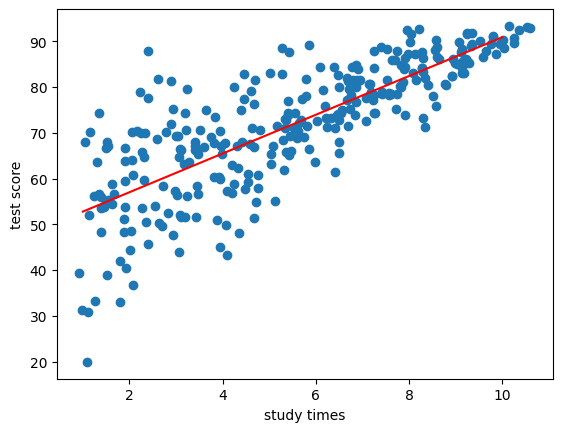

52.77987554836093


In [71]:
import matplotlib.pyplot as plt
import numpy as np

val = x = np.linspace(1, 10, 400)

y = Beta0 + Beta1*val

plt.scatter(times, scores)
plt.plot(val, y, 'r')

plt.xlabel("study times")
plt.ylabel("test score")

plt.show()
print(linear_regression(1))

### RSE


In [35]:
import math

sum_bun_za_rse = 0

for i in range(1,len(scores)):
  sum_bun_za_rse += ((scores[i]-average_y)**2)

RSS = math.sqrt(sum_bun_za/(len(scores)-2))
# print(math.sqrt(sum_bun_za/(len(scores))))

print(RSS)

6.3790063014889755


In [36]:
TSS = 0
for i in range(1,len(scores)):
  TSS += ((scores[i]-average_y)**2)

TSS = TSS / len(scores) 

print(TSS)

199.216601263786


분산을 위 코드처럼 구해도 되는 거 맞나

((편차^2)의 평균)에서 말하는 편차는 실제 value들과 예측한 함수와의 차이가 되어야 하는 거 아닌가

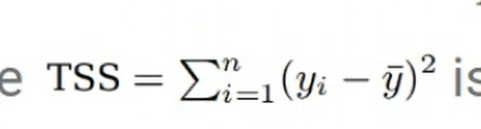

근데 왜 여기서는...


In [45]:
# 이게 진짜 편차 아닌가

TSS_2 = 0
for i in range(1,len(scores)-1):
  TSS_2 += ((scores[i]-linear_regression(times[i]))**2)

TSS_2 = TSS_2 / (len(scores)-1)

print(TSS_2)

8.726701734155304


In [46]:
print(1 - (RSS/TSS)) # 엥 이렇게 잘나온다고?
print(1 - (RSS/TSS_2)) # 얜 뭐지... 몇 이상 나와야 `잘나왔다`라고 판단할 수 있는 걸까

0.9679795445709747
0.26902436959403797


### Likelyhood part

p_theta(x1)

p_theta라는 확률 분포에서 x1이 나올 확률

L(theta; x1, x2 ... xn) = p*theta(x1) * p*theta(x2) * p_theta(xn)
Likelyhood

확률분포의 모형은 알지만, theta라는 파라미터는 모른다. 그래도 likelyhood는 계산 가능.

---

정규 분포는 `평균`이랑 `표편` 두 개의 파라미터를 가지기에... 그럼 평균이랑 표편을 둘 다 theta로 두는 건가

-> theta: 확률 분포를 정의하는 모든 파라미터의 집합


---

MLE = log-Likelyhood를 최대로 해주는 theta를 찾는.. -> p_theta라는 확률 분포에서 x1, x2 ... 가 나올 확률이 최대가 되도록 하는 theta를 찾는...

예측theta(x1, x2, x3 ... xn) = argmax_theta log-Likelyhood -> log-likelyhood가 최대가 되는 theta를 찾는..


---

아

x에 따른 y_hat값 = 평균이 trasposed_Beta\*x이고, 표편(분산)이 sigma^2

정규분포공식(transposed_Beta \* x, sigma^2)

이렇게 두면, 이 때의 theta는 Beta가 됨.

여기에 log-likelyhood 공식 넣고 미분 -> 0이되는 theta

뭐야 되게 간단했었네
